In [1]:
import numpy as np
import scipy as sp
from scipy import integrate
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

\begin{equation}
K(t,x,y)={\frac {1}{(4\pi t)^{d/2}}}e^{-|x-y|^{2}/4t}
\end{equation}

In [2]:
def heat_kernel(xx,yy,tt,epsilon=.0001):
    c = 1/(4*np.pi*tt)**(1/2)
    return c*np.exp(-1*np.abs(xx-yy)**2/(4*tt))

In [97]:
def gaussian(xx):
    c = 1/(2*np.pi)**(1/2)
    return c*np.exp(-1*np.abs(xx)**2/2)

In [98]:
def heat_solve(u_0,xx,tt):
    u = np.array([u_0])
    u_temp = u_0
    for i in range(len(tt) - 1):
        u_t = np.gradient(np.gradient(u_temp))
        u_temp = u_temp + (tt[i+1] - tt[i]) * u_t
        u = np.concatenate((u,np.array([u_temp])))
    return u

In [99]:
def laplacian(u):
    return np.diff(np.pad(u, ((1,1), (0,0))), n=2, axis=0)\
        + np.diff(np.pad(u, ((0,0), (1,1))), n=2, axis=1)

In [106]:
xx = np.linspace(-10, 10)
tt = np.linspace(0, 30)
u_0 = gaussian(xx)

In [107]:
u = heat_solve(u_0, xx, tt)

In [108]:
tt[1] - tt[0]

0.6122448979591837

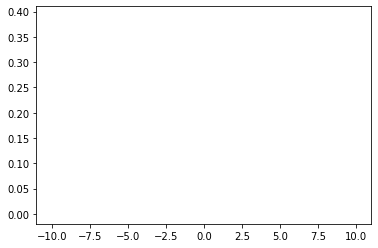

In [109]:
fig = plt.figure()
ims = [plt.plot(xx, datum, animated=True) for datum in u]
ani = animation.ArtistAnimation(fig, ims)
HTML(ani.to_jshtml())